In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import math
from os import path

In [5]:
plt.rc('text', usetex=True)

inpath = "../../"

currentfile = "Imitator_2_2400.csv"

# Read from file
strdatatype = np.dtype([('N', np.int_, (2,)), ('Time_Count', np.int_ ), ('Mode', np.int_ ),
                            ('T', np.float_, (10,)), ('S', np.bool_, (10,)), ('System_State', np.bool_ )])
N, Time_Count, Mode, T, S, System_State = np.loadtxt(path.join(inpath, currentfile),
        unpack=True, delimiter=';', skiprows=1, dtype=strdatatype)

[   0    1    2 ... 2398 2399 2400]
[46.46008296 51.17311    51.98049593 ... 31.6890129  39.37156188
 43.50980433]


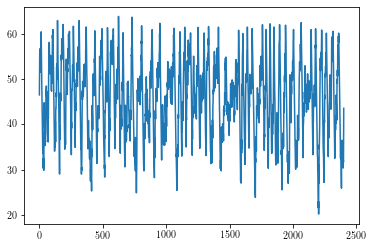

In [22]:
print(N[:, 1])
print(T[:, 9])
plt.plot(N[:, 1], T[:, 9])
plt.show()

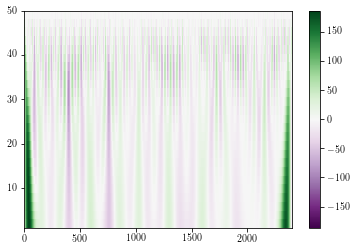

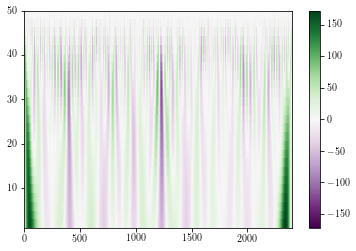

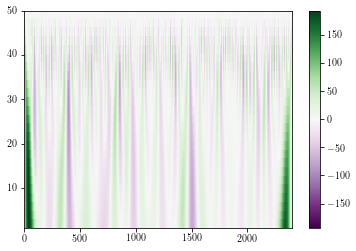

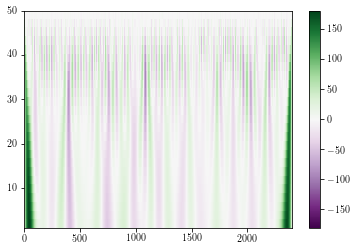

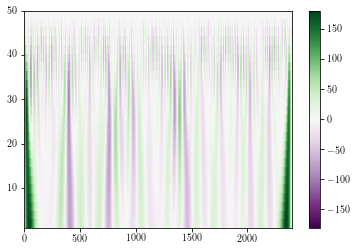

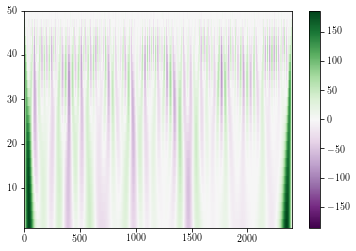

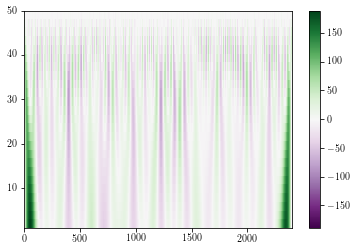

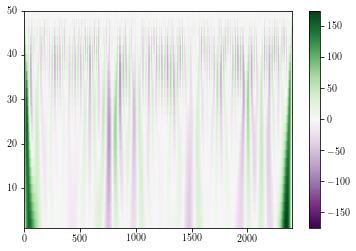

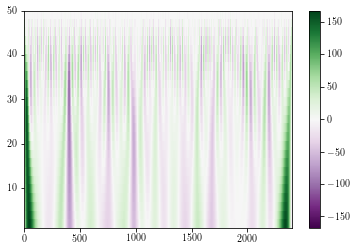

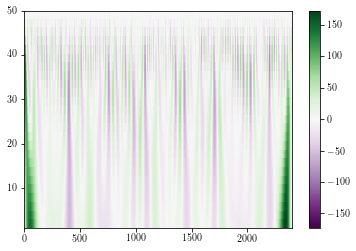

In [33]:
# t = np.linspace(-1, 1, 601, endpoint=True)
# sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=3)
# sig  = np.cos(2 * np.pi * 7 * t)
# sig  = signal.gausspulse(t - 0.4, fc=2)
# plt.plot(t, sig)
# plt.show()
w_start = 1
w_stop = 50
w_step = 2
widths = np.arange(w_start, w_stop, w_step)
for index in range(0, 10):
    cwtmatr = signal.cwt(T[:, index], signal.ricker, widths)
    plt.imshow(cwtmatr, extent=[0, 2400, w_start, w_stop], cmap='PRGn', aspect='auto',
                   vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    # plt.imshow(cwtmatr, cmap='PRGn', aspect='auto',
    #                vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.colorbar()
    plt.show()

200


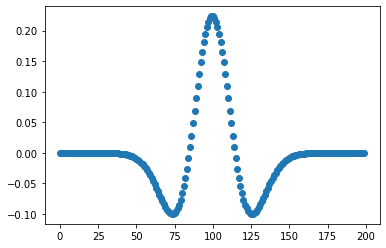

In [41]:
points = 200
a = 15
vec2 = signal.ricker(points, a)
print(len(vec2))
plt.plot(vec2, 'o')
plt.show()

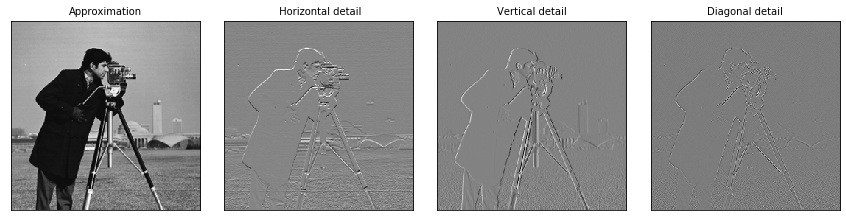

In [3]:
import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()